# Air Quality Analysis during Lockdown in Ile-de-France

## How did the sudden traffic drop affect air quality ?

---

#### Dataset

Concentrations of 5 pollutants are studied : NO2, NOx, O3, PM10 and PM2.5. The measurements have been made by [AirParif](https://www.airparif.asso.fr/).

----

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import seaborn as sns

plt.style.use('seaborn-whitegrid')

### Import Data

In [3]:
data_NO2 = pd.read_csv("airparif/20170301_20200511-NO2_auto.csv", sep=";", na_values="n/d", dtype='a')
data_NOX = pd.read_csv("airparif/20170301_20200511-NOX_auto.csv", sep=";", na_values="n/d", dtype='a')
data_O3 = pd.read_csv("airparif/20170301_20200511-O3_auto.csv", sep=";", na_values="n/d", dtype='a')
data_PM10 = pd.read_csv("airparif/20170301_20200511-PM10_auto.csv", sep=";", na_values="n/d", dtype='a')
data_PM25 = pd.read_csv("airparif/20170301_20200511-PM25_auto.csv", sep=";", na_values="n/d", dtype='a')

In [8]:
data_NOX.head()

,date,heure,EVRY,PA01H,LOGNES,VILLEM,GEN,ARG,GON,DEF,...,BASCH,PA12,CELES,ELYS,EIFF3,TREMB,AUB,IVRY,BP_EST,PA07
0,NaN,NaN,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,...,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3,microg/m3
1,01/03/2017,1,5,NaN,8,8,8,7,9,4,...,42,11,NaN,38,NaN,13,13,10,18,12
2,01/03/2017,2,5,NaN,7,8,7,7,10,3,...,29,9,NaN,23,NaN,11,12,10,16,12
3,01/03/2017,3,4,NaN,6,8,7,8,10,4,...,27,10,NaN,25,NaN,13,10,10,17,12
4,01/03/2017,4,6,NaN,8,10,8,14,11,4,...,27,11,NaN,25,NaN,14,13,11,20,13


### Data Extraction of the studied periods

In [9]:
def study_period(data, years):
    allyears = []
    for year in years:
        start = data[(data["date"]==('17/03/'+str(year)))
                  &(data["heure"]=='1')].index
        end = data[(data["date"]==('11/05/'+str(year)))
                  &(data["heure"]=='24')].index
        data_extracted = data[(data.index.values >= start.values)
                         &(data.index.values <= end.values)]
        allyears.append(data_extracted)
    return allyears

In [10]:
years = [2017, 2018, 2019, 2020]
#NO2
data_NO2_allyears = study_period(data_NO2, years)
#NOX
data_NOX_allyears = study_period(data_NOX, years)
#O3
data_O3_allyears = study_period(data_O3, years)
#PM10
data_PM10_allyears = study_period(data_PM10, years)
#PM2.5
data_PM25_allyears = study_period(data_PM25, years)

### Average Calculation

In [11]:
def avr_calculation(data):
    allyears = []
    for year in data:
        df = year.iloc[:,2:]
        df = df.fillna(axis=1, method='ffill')
        if df.isna().any().any() == True :
            df = df.fillna(axis=1, method='bfill')
        df = df.to_numpy().astype(float)
        df = df.mean(axis=1) 
        df = pd.concat([year,pd.DataFrame(df, index = year.index, columns = ["MEAN"])], axis=1)
        allyears.append(df)
    return allyears

In [12]:
#NO2
data_NO2_allyears = avr_calculation(data_NO2_allyears)
#NOX
data_NOX_allyears = avr_calculation(data_NOX_allyears)
#O3
data_O3_allyears = avr_calculation(data_O3_allyears)
#PM10
data_PM10_allyears = avr_calculation(data_PM10_allyears)
#PM2.5
data_PM25_allyears = avr_calculation(data_PM25_allyears)

In [13]:
data_NO2_allyears[2].head()

,date,heure,EVRY,PA01H,LOGNES,VILLEM,GEN,MELUN,ARG,GON,...,SOULT,CELES,ELYS,EIFF3,TREMB,AUB,IVRY,BP_EST,PA07,MEAN
17905,17/03/2019,1,7,NaN,7,9,7,7,5,11,...,17,15,22,4,10,15,NaN,40,7,15.761905
17906,17/03/2019,2,9,NaN,6,8,7,5,5,10,...,17,14,17,5,9,15,NaN,32,6,14.285714
17907,17/03/2019,3,6,NaN,6,7,5,5,3,7,...,13,9,14,4,8,11,NaN,25,4,10.833333
17908,17/03/2019,4,7,NaN,5,7,5,4,3,6,...,10,8,10,4,8,8,NaN,20,3,9.166667
17909,17/03/2019,5,8,NaN,5,7,5,4,3,6,...,15,11,16,3,8,10,NaN,24,5,10.857143


In [14]:
def daily_maximum(data):
    allyears = []
    #find the maximum for each day
    for year in data:
        #extract each unique day
        df = year.iloc[:,[0,-1]]
        days = df["date"].unique()
        maximums = np.array([])
        for day in np.arange(len(days)):
            df2 = df[df["date"]==df["date"].unique()[day]]
            m = df2["MEAN"].max()
            maximums=np.append(maximums,m)
        daily = pd.DataFrame([days, maximums]).transpose()
        daily.columns = ["date", "max"]
        allyears.append(daily)
    return allyears

In [15]:
#NO2
daily_NO2_allyears = daily_maximum(data_NO2_allyears)
#NOX
daily_NOX_allyears = daily_maximum(data_NOX_allyears)
#O3
daily_O3_allyears = daily_maximum(data_O3_allyears)
#PM10
daily_PM10_allyears = daily_maximum(data_PM10_allyears)
#PM2.5
daily_PM25_allyears = daily_maximum(data_PM25_allyears)

In [16]:
averages_on_period = pd.DataFrame([[data_NO2_allyears[0]["MEAN"].to_numpy().mean(),
                                   data_NO2_allyears[1]["MEAN"].to_numpy().mean(),
                                   data_NO2_allyears[2]["MEAN"].to_numpy().mean(),
                                   data_NO2_allyears[3]["MEAN"].to_numpy().mean()],
                                  [data_NOX_allyears[0]["MEAN"].to_numpy().mean(),
                                  data_NOX_allyears[1]["MEAN"].to_numpy().mean(),
                                  data_NOX_allyears[2]["MEAN"].to_numpy().mean(),
                                  data_NOX_allyears[3]["MEAN"].to_numpy().mean()],
                                  [data_O3_allyears[0]["MEAN"].to_numpy().mean(),
                                  data_O3_allyears[1]["MEAN"].to_numpy().mean(),
                                  data_O3_allyears[2]["MEAN"].to_numpy().mean(),
                                  data_O3_allyears[3]["MEAN"].to_numpy().mean()],
                                  [data_PM10_allyears[0]["MEAN"].to_numpy().mean(),
                                  data_PM10_allyears[1]["MEAN"].to_numpy().mean(),
                                  data_PM10_allyears[2]["MEAN"].to_numpy().mean(),
                                  data_PM10_allyears[3]["MEAN"].to_numpy().mean()],
                                  [data_PM25_allyears[0]["MEAN"].to_numpy().mean(),
                                  data_PM25_allyears[1]["MEAN"].to_numpy().mean(),
                                  data_PM25_allyears[2]["MEAN"].to_numpy().mean(),
                                  data_PM25_allyears[3]["MEAN"].to_numpy().mean()]],
                                 index=["NO2","NOX","O3","PM10","PM25"],
                                 columns=["2017","2018","2019","2020"])

averages_on_period

,2017,2018,2019,2020
NO2,39.443204,38.698732,39.391387,20.440937
NOX,83.616295,78.604687,79.100019,32.594196
O3,60.078404,63.966673,62.935268,70.354601
PM10,25.082143,24.696071,26.737798,22.672113
PM25,12.922247,12.692921,15.491656,13.142591


In [17]:
(averages_on_period.loc["NO2"]["2020"] - averages_on_period.loc["NO2"][["2017","2018","2019"]].mean()) *100 / averages_on_period.loc["NO2"][["2017","2018","2019"]].mean()

df = pd.concat([averages_on_period,pd.DataFrame([[(averages_on_period.loc["NO2"]["2020"] - averages_on_period.loc["NO2"][["2017","2018","2019"]].mean()) *100 / averages_on_period.loc["NO2"][["2017","2018","2019"]].mean(),
                                                 (averages_on_period.loc["NO2"]["2020"] - averages_on_period.loc["NO2"]["2019"]) *100 / averages_on_period.loc["NO2"]["2019"]],
                                                [(averages_on_period.loc["NOX"]["2020"] - averages_on_period.loc["NOX"][["2017","2018","2019"]].mean()) *100 / averages_on_period.loc["NOX"][["2017","2018","2019"]].mean(),
                                                (averages_on_period.loc["NOX"]["2020"] - averages_on_period.loc["NOX"]["2019"]) *100 / averages_on_period.loc["NOX"]["2019"]],
                                                [(averages_on_period.loc["O3"]["2020"] - averages_on_period.loc["O3"][["2017","2018","2019"]].mean()) *100 / averages_on_period.loc["O3"][["2017","2018","2019"]].mean(),
                                                (averages_on_period.loc["O3"]["2020"] - averages_on_period.loc["O3"]["2019"]) *100 / averages_on_period.loc["O3"]["2019"]],
                                                [(averages_on_period.loc["PM10"]["2020"] - averages_on_period.loc["PM10"][["2017","2018","2019"]].mean()) *100 / averages_on_period.loc["PM10"][["2017","2018","2019"]].mean(),
                                                (averages_on_period.loc["PM10"]["2020"] - averages_on_period.loc["PM10"]["2019"]) *100 / averages_on_period.loc["PM10"]["2019"]],
                                                [(averages_on_period.loc["PM25"]["2020"] - averages_on_period.loc["PM25"][["2017","2018","2019"]].mean()) *100 / averages_on_period.loc["PM25"][["2017","2018","2019"]].mean(),
                                                (averages_on_period.loc["PM25"]["2020"] - averages_on_period.loc["PM25"]["2019"]) *100 / averages_on_period.loc["PM25"]["2019"]]], 
                                                index = averages_on_period.index, 
                                                columns = ["EVOLmean","EVOL2019"])], axis=1)
df

,2017,2018,2019,2020,EVOLmean,EVOL2019
NO2,39.443204,38.698732,39.391387,20.440937,-47.825171,-48.108106
NOX,83.616295,78.604687,79.100019,32.594196,-59.480282,-58.793693
O3,60.078404,63.966673,62.935268,70.354601,12.880208,11.788832
PM10,25.082143,24.696071,26.737798,22.672113,-11.108358,-15.205757
PM25,12.922247,12.692921,15.491656,13.142591,-4.084601,-15.163418


### Plotting

In [52]:
def plot_figure(years, pollutant, data, averages, fg, res, colors, save):
    fig = plt.figure(figsize=fg, dpi=res)
    ax = plt.axes()
    i=0
    
    #check if user wants to plot several years or only one
    if (type(years) == list) and (type(data) == list) and (type(colors) == list):
        
        for year in data:
            plot = plt.bar(year["date"].to_numpy(), 
                  year["max"].to_numpy(), 
                          label =  str(years[i])+" Maximums")

            mean = plt.plot(year["date"].to_numpy(), 
                            averages.loc[pollutant, str(years[i])] 
                            * np.ones(len(year["date"].to_numpy())), 
                            label = str(years[i])+" Mean", color = colors[i])         
            i=i+1
            
        start, end = ax.get_xlim()
        ax.xaxis.set_ticks(np.arange(start, end, 7.0))
            
    else:
        plot = plt.bar(data["date"].to_numpy(), 
                  data["max"].to_numpy(), 
                          label =  str(years)+" Maximums")

        mean = plt.plot(data["date"].to_numpy(), 
                        averages.loc[pollutant, str(years)] 
                        * np.ones(len(data["date"].to_numpy())), 
                        label = str(years)+" Mean", color = colors)  
                     
    plt.title(pollutant)
    plt.legend()
    plt.ylabel("Concentration (microg/m3)") 
    ticks = plt.xticks(rotation=90)
    
    if save:
        plt.savefig("graph_results/" + pollutant + ".png")
    

You can plot several years on the same graph :

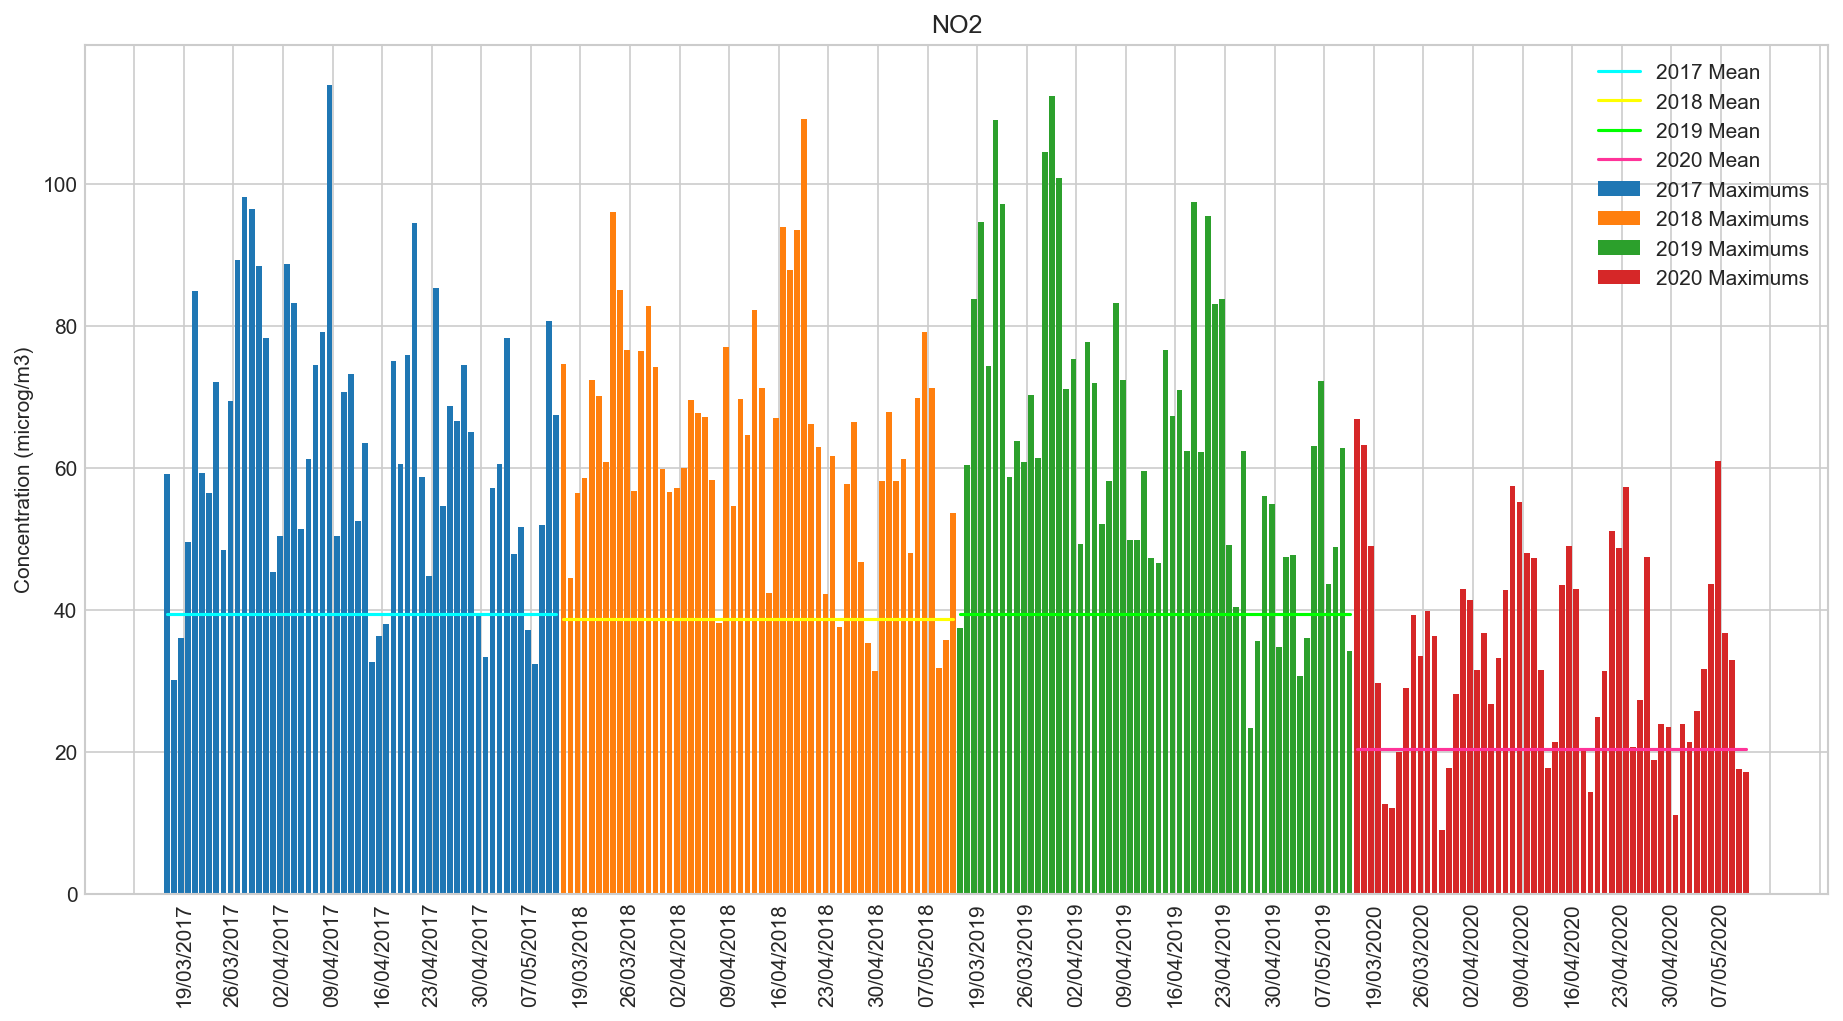

In [53]:
plot_figure(years, "NO2", daily_NO2_allyears, 
            averages_on_period, (15,7.5), 150, 
            ['cyan', '#ffff00', '#00ff00', '#ff3399'], False)

Or only one year to dive in the details :

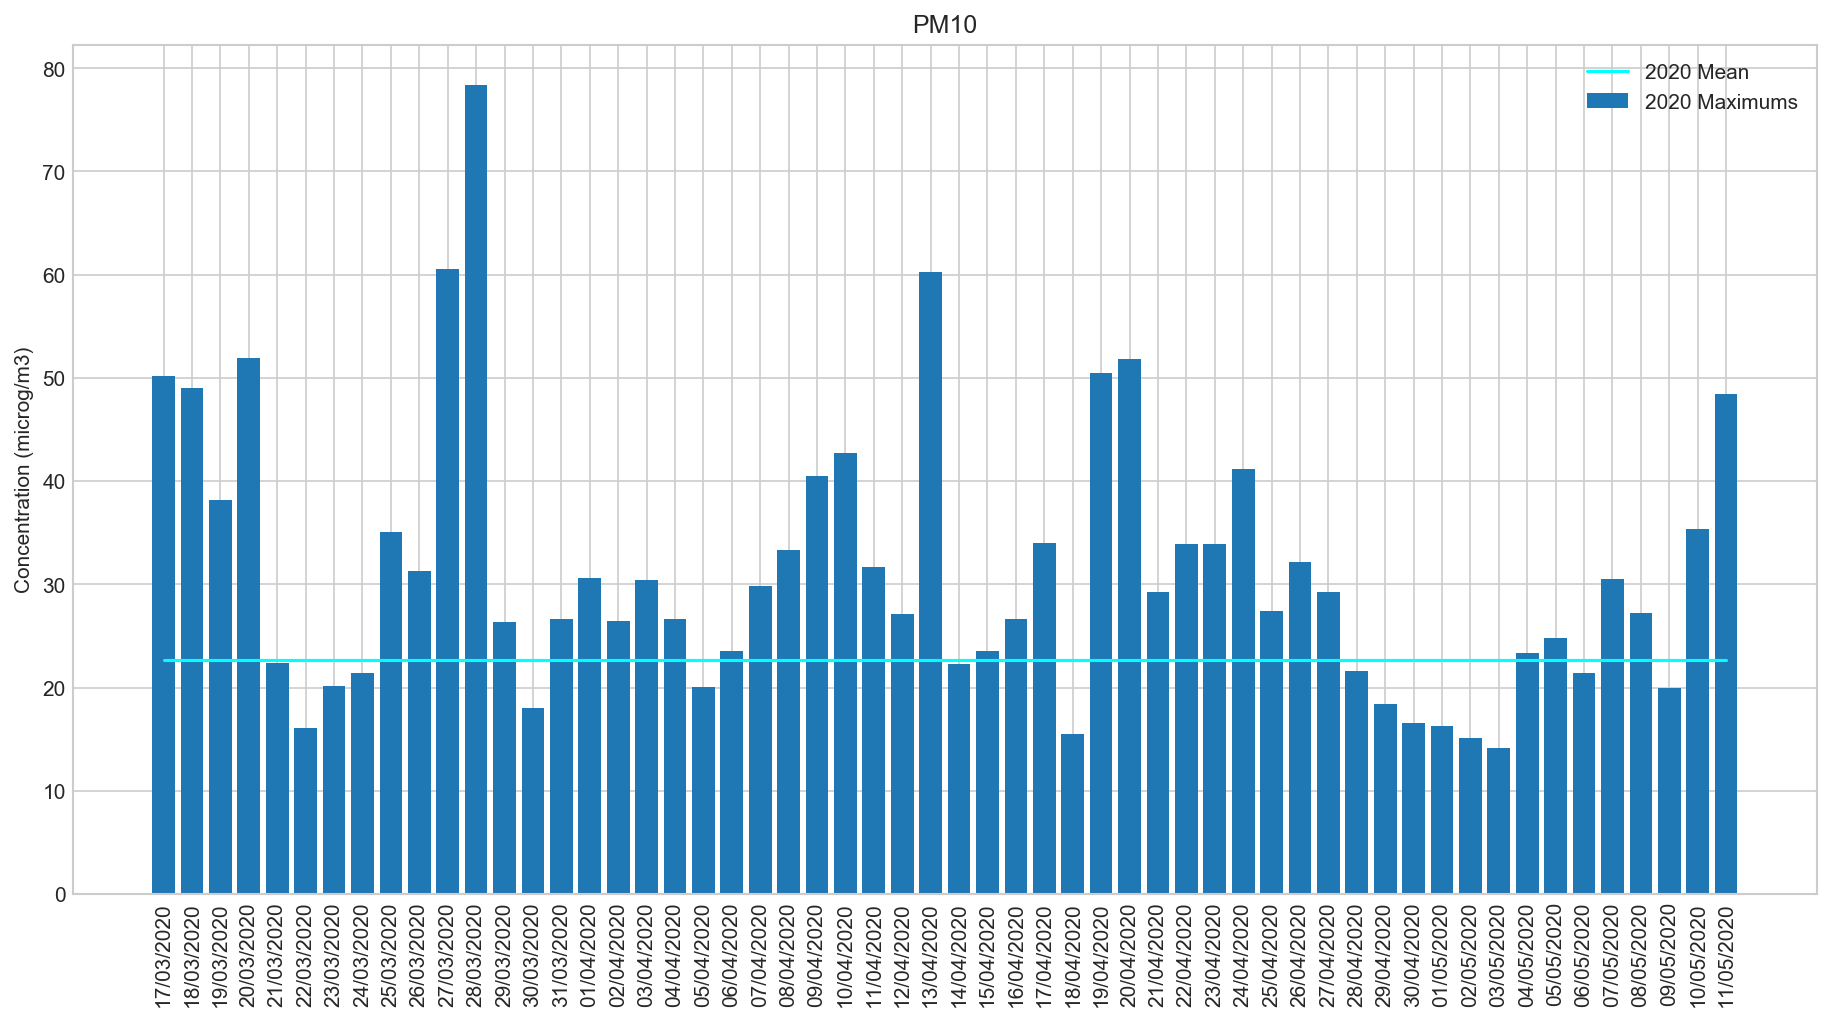

In [54]:
plot_figure(years[3], "PM10", daily_PM10_allyears[3], 
            averages_on_period, (15,7.5), 150, 
            'cyan', False)

-------
### Weather
data from Météo France.

The idea is to look for correlation between pollutant concentrations and wheather parameters such as wind, humidity (rain), clouds (sun)...

| Descriptif | Mnémonique | type | unité |
| :----: | :----: | :----: | :----: |
| Indicatif OMM station | numer_sta | car |  |
| Date (UTC) | date | car | AAAAMMDDHHMISS |
| Pression au niveau mer | pmer | int | Pa |
| Variation de pression en 3 heures | tend | int | Pa |
| Type de tendance barométrique | cod_tend | int | code (0200) |
| Direction du vent moyen 10 mn | dd | int | degré |
| Vitesse du vent moyen 10 mn | ff | réel | m/s |
| Température | t | réel | K |
| Point de rosée | td | réel | K |
| Humidité | u | int | % |
| Visibilité horizontale | vv | réel | m |
| Temps présent | ww  | int | code (4677) |
| Temps passé 1 | w1 | int | code (4561) |
| Temps passé 2 | w2 | int | code (4561) |
| Nebulosité totale | n | réel | % |

code station ORLY : 07149

In [55]:
weather_202003 = pd.read_csv("meteo_france/synop.202003.csv", sep=";", na_values="mq", dtype='a')

In [56]:
weather_202003.head()

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4,Unnamed: 59
0,07005,20200301000000,99450,-60,8,220,4.400000,278.050000,274.850000,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07015,20200301000000,99430,-30,7,200,9.400000,278.250000,274.550000,77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07020,20200301000000,99300,20,3,250,14.800000,280.850000,277.750000,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07027,20200301000000,99610,-30,7,230,10.000000,279.350000,275.250000,75,...,5,NaN,1350,6,NaN,4860,NaN,NaN,NaN,NaN
4,07037,20200301000000,99680,-40,8,210,7.400000,277.450000,275.350000,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
weather_202003 = weather_202003[weather_202003["numer_sta"] == "07149"]

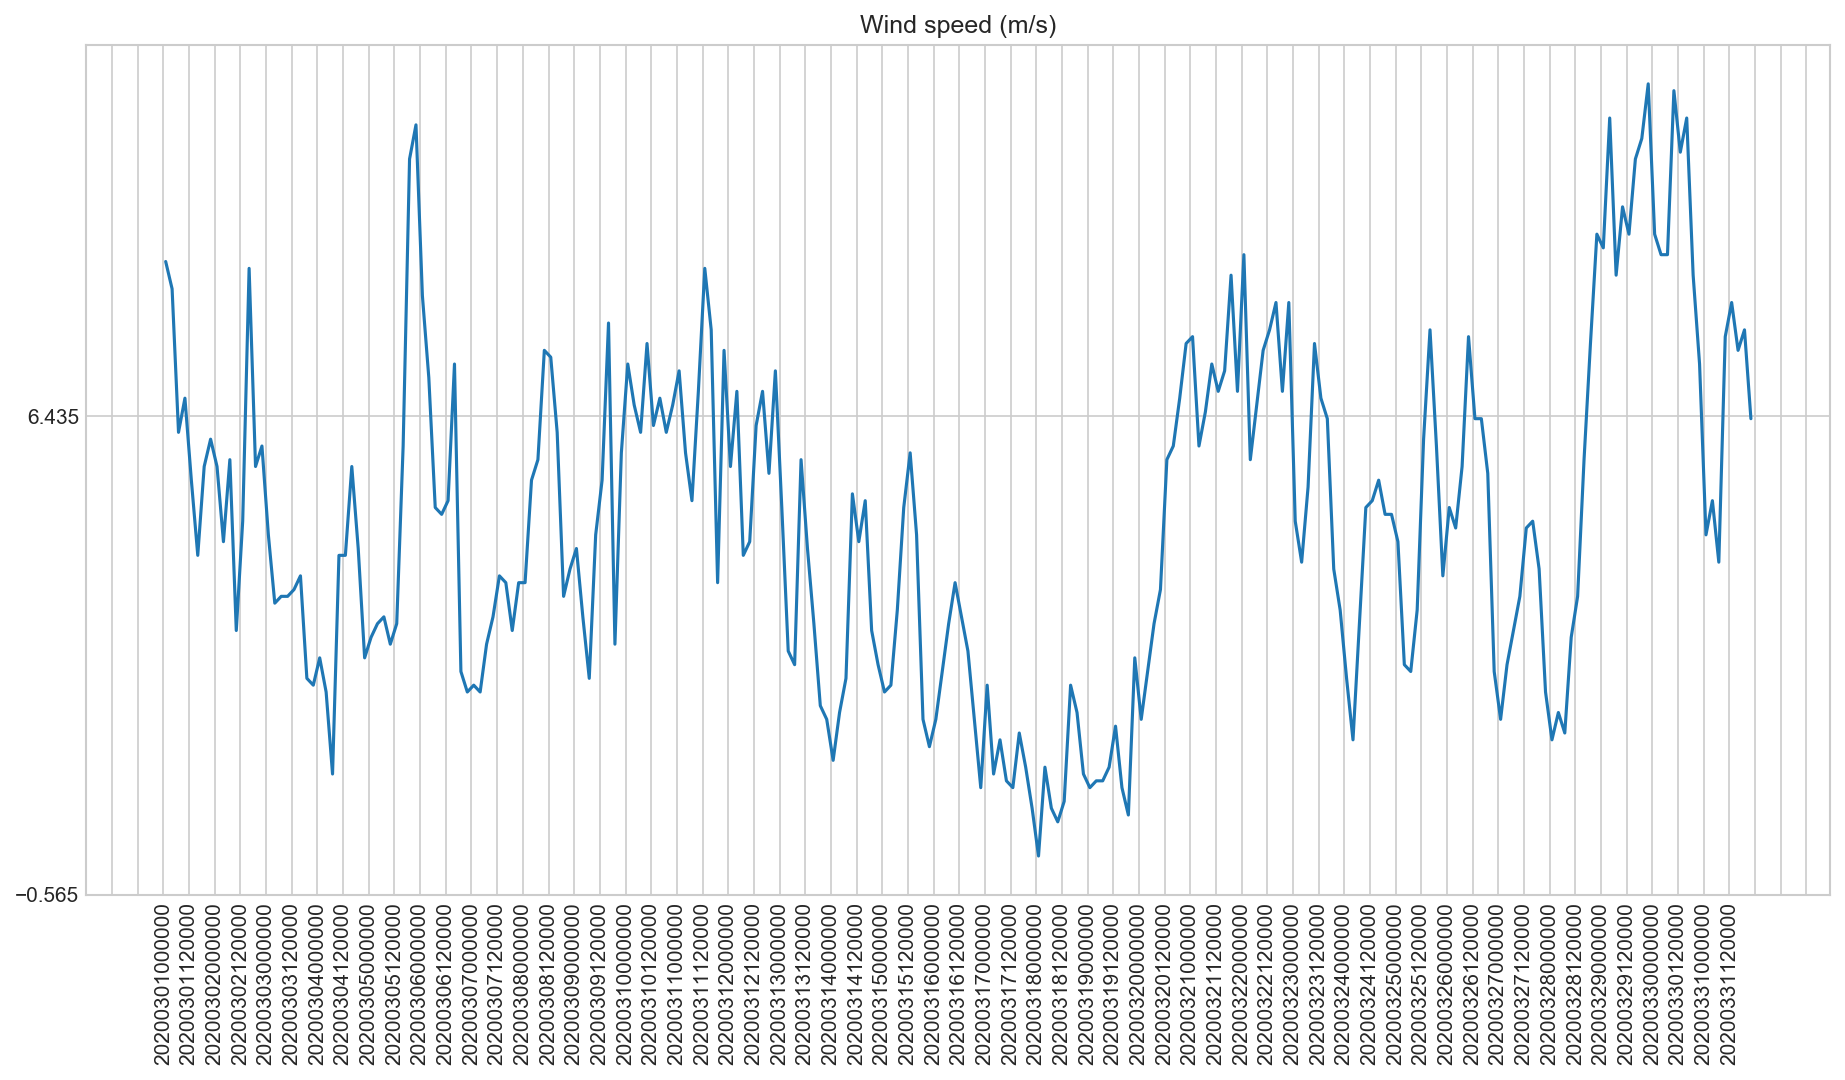

In [60]:
fig = plt.figure(figsize=(15,7.5), dpi=150)
ax = plt.axes()

weather = plt.plot(weather_202003["date"].to_numpy(), 
              weather_202003["ff"].to_numpy().astype(float), 
                      label = "wind speed")

plt.title("Wind speed (m/s)")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 4.0))
ticks = plt.xticks(rotation=90)
start2, end2 = ax.get_ylim()
ticks2 = ax.yaxis.set_ticks(np.arange(start2, end2, 7.0))